<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/1_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_(k_NN)_%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Метод k ближайших соседей (k-NN) в машинном обучении и кластеризация



## 1. Введение в кластеризацию

Кластеризация — это одна из ключевых задач машинного обучения, относящаяся к области обучения без учителя (unsupervised learning). Её цель заключается в разделении набора данных на группы (кластеры) таким образом, чтобы объекты внутри одного кластера были "похожи" друг на друга, а объекты из разных кластеров — существенно отличались. В отличие от задач классификации, в кластеризации отсутствуют заранее заданные метки классов, что делает её более сложной и интересной для анализа.



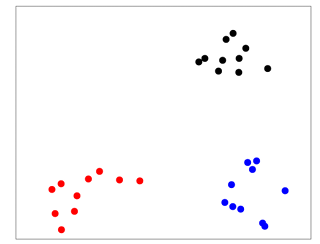


**Рисунок 1:** Набор данных, который необходимо разделить на кластеры, где объекты внутри одного кластера схожи между собой.

Интуитивно кластеризация может быть определена как процесс разделения объектов (точек данных) на подмножества, где каждое подмножество состоит из «похожих» объектов.

**Примеры применения кластеризации:**

1. **Новостные статьи:** группировка статей по схожим темам.
2. **Медицина:** разделение пациентов на группы с похожими симптомами.
3. **Социальные сети:** выделение сообществ с общими интересами.
4. **Маркетинг:** сегментация клиентов по схожим покупательским привычкам.
5. **Изображения:** группировка изображений по содержанию.

Для того чтобы кластеризация была эффективной, необходимо определить меру схожести объектов. Математически это означает выбор подходящей метрики расстояния (нормы). Часто используется евклидова норма. После выбора нормы необходимо задать критерий, по которому будут формироваться кластеры.


#### 2. Критерий k-средних

Одним из наиболее распространённых критериев для определения кластеров является критерий k-средних. Этот метод основан на минимизации суммы квадратов расстояний между точками данных внутри одного кластера и центроидом этого кластера.

Формально, пусть даны точки $x_1, \dots, x_n \in \mathbb{R}^d$. Мы разбиваем эти точки на $k$ кластеров $C_1, \dots, C_k$, минимизируя целевую функцию:

$$
\min_{C_1, \dots, C_k} \sum_{l=1}^k \frac{1}{|C_l|} \sum_{i,j \in C_l} \| x_i - x_j \|^2.
$$

Эта функция представляет собой взвешенное среднее дисперсий кластеров, где веса пропорциональны размеру кластера $|C_l|$.

Для упрощения задачи введём понятие центроида (центра масс) кластера:

$$
\mu_l = \frac{1}{|C_l|} \sum_{i \in C_l} x_i.
$$

Тогда можно показать, что:

$$
\sum_{i,j \in C_l} \| x_i - x_j \|^2 = 2|C_l| \sum_{i \in C_l} \| x_i - \mu_l \|^2.
$$

где:
- $C_l$ — кластер с точками $x_i$,
- $\mu_l = \frac{1}{|C_l|} \sum_{i \in C_l} x_i$ — центроид кластера $C_l$,
- $|C_l|$ — количество точек в кластере $C_l$.



**Лемма 1.**  
Для любого кластера $C_l$, состоящего из точек $x_i$, выполняется равенство:

$$
\sum_{i,j \in C_l} \| x_i - x_j \|^2 = 2|C_l| \sum_{i \in C_l} \| x_i - \mu_l \|^2,
$$


### Доказательство

1. **Раскроем квадрат расстояния:**

   Квадрат евклидова расстояния между двумя точками $x_i$ и $x_j$ можно записать как:

$$
   \| x_i - x_j \|^2 = \| x_i \|^2 + \| x_j \|^2 - 2 \langle x_i, x_j \rangle,
$$

   где $\langle x_i, x_j \rangle$ — скалярное произведение векторов $x_i$ и $x_j$.

2. **Подставим это выражение в сумму:**

   Подставим это выражение в сумму квадратов расстояний между всеми парами точек в кластере $C_l$:

$$
   \sum_{i,j \in C_l} \| x_i - x_j \|^2 = \sum_{i,j \in C_l} \left( \| x_i \|^2 + \| x_j \|^2 - 2 \langle x_i, x_j \rangle \right).
$$

3. **Разделим сумму на три части:**

   Разделим сумму на три отдельные суммы:

$$
   \sum_{i,j \in C_l} \| x_i - x_j \|^2 = \sum_{i,j \in C_l} \| x_i \|^2 + \sum_{i,j \in C_l} \| x_j \|^2 - 2 \sum_{i,j \in C_l} \langle x_i, x_j \rangle.
$$

4. **Упростим каждую сумму:**

   - Первая сумма $\sum_{i,j \in C_l} \| x_i \|^2$:

     Поскольку $\| x_i \|^2$ не зависит от $j$, эту сумму можно переписать как:

$$
     \sum_{i,j \in C_l} \| x_i \|^2 = \sum_{i \in C_l} \| x_i \|^2 \cdot \sum_{j \in C_l} 1 = |C_l| \sum_{i \in C_l} \| x_i \|^2.
$$

   - Вторая сумма $\sum_{i,j \in C_l} \| x_j \|^2$:

     Аналогично, $\| x_j \|^2$ не зависит от $i$, поэтому:

$$
     \sum_{i,j \in C_l} \| x_j \|^2 = \sum_{j \in C_l} \| x_j \|^2 \cdot \sum_{i \in C_l} 1 = |C_l| \sum_{j \in C_l} \| x_j \|^2.
$$

     Заметим, что $\sum_{i \in C_l} \| x_i \|^2 = \sum_{j \in C_l} \| x_j \|^2$, так как это одна и та же сумма, просто с разными индексами.

   - Третья сумма $\sum_{i,j \in C_l} \langle x_i, x_j \rangle$:

     Эту сумму можно переписать как:

$$
     \sum_{i,j \in C_l} \langle x_i, x_j \rangle = \left\langle \sum_{i \in C_l} x_i, \sum_{j \in C_l} x_j \right\rangle = \left\| \sum_{i \in C_l} x_i \right\|^2.
$$

5. **Подставим упрощённые суммы обратно:**

   Теперь подставим упрощённые суммы обратно в исходное выражение:

$$
   \sum_{i,j \in C_l} \| x_i - x_j \|^2 = |C_l| \sum_{i \in C_l} \| x_i \|^2 + |C_l| \sum_{j \in C_l} \| x_j \|^2 - 2 \left\| \sum_{i \in C_l} x_i \right\|^2.
$$

   Поскольку $\sum_{i \in C_l} \| x_i \|^2 = \sum_{j \in C_l} \| x_j \|^2$, это выражение можно записать как:

$$
   \sum_{i,j \in C_l} \| x_i - x_j \|^2 = 2|C_l| \sum_{i \in C_l} \| x_i \|^2 - 2 \left\| \sum_{i \in C_l} x_i \right\|^2.
$$

6. **Выразим через центроид $\mu_l$:**

   Вспомним, что центроид $\mu_l$ определяется как:

$$
   \mu_l = \frac{1}{|C_l|} \sum_{i \in C_l} x_i.
$$

   Тогда:

$$
   \sum_{i \in C_l} x_i = |C_l| \mu_l.
$$

   Подставим это в выражение:

$$
   \sum_{i,j \in C_l} \| x_i - x_j \|^2 = 2|C_l| \sum_{i \in C_l} \| x_i \|^2 - 2 \| |C_l| \mu_l \|^2.
$$

   Упростим второе слагаемое:

$$
   \| |C_l| \mu_l \|^2 = |C_l|^2 \| \mu_l \|^2.
$$

   Теперь выражение принимает вид:

$$
   \sum_{i,j \in C_l} \| x_i - x_j \|^2 = 2|C_l| \sum_{i \in C_l} \| x_i \|^2 - 2|C_l|^2 \| \mu_l \|^2.
$$

7. **Выразим $\sum_{i \in C_l} \| x_i \|^2$ через $\mu_l$:**

   Заметим, что:

$$
   \sum_{i \in C_l} \| x_i - \mu_l \|^2 = \sum_{i \in C_l} \left( \| x_i \|^2 + \| \mu_l \|^2 - 2 \langle x_i, \mu_l \rangle \right).
$$

   Раскроем это выражение:

$$
   \sum_{i \in C_l} \| x_i - \mu_l \|^2 = \sum_{i \in C_l} \| x_i \|^2 + |C_l| \| \mu_l \|^2 - 2 \left\langle \sum_{i \in C_l} x_i, \mu_l \right\rangle.
$$

   Поскольку $\sum_{i \in C_l} x_i = |C_l| \mu_l$, то:

$$
   \left\langle \sum_{i \in C_l} x_i, \mu_l \right\rangle = |C_l| \| \mu_l \|^2.
$$

   Подставим это обратно:

$$
   \sum_{i \in C_l} \| x_i - \mu_l \|^2 = \sum_{i \in C_l} \| x_i \|^2 + |C_l| \| \mu_l \|^2 - 2|C_l| \| \mu_l \|^2.
$$

   Упростим:

$$
   \sum_{i \in C_l} \| x_i - \mu_l \|^2 = \sum_{i \in C_l} \| x_i \|^2 - |C_l| \| \mu_l \|^2.
$$

   Отсюда:

$$
   \sum_{i \in C_l} \| x_i \|^2 = \sum_{i \in C_l} \| x_i - \mu_l \|^2 + |C_l| \| \mu_l \|^2.
$$

8. **Подставим это выражение обратно:**

   Теперь подставим $\sum_{i \in C_l} \| x_i \|^2$ в наше основное выражение:

$$
   \sum_{i,j \in C_l} \| x_i - x_j \|^2 = 2|C_l| \left( \sum_{i \in C_l} \| x_i - \mu_l \|^2 + |C_l| \| \mu_l \|^2 \right) - 2|C_l|^2 \| \mu_l \|^2.
$$

   Раскроем скобки:

$$
   \sum_{i,j \in C_l} \| x_i - x_j \|^2 = 2|C_l| \sum_{i \in C_l} \| x_i - \mu_l \|^2 + 2|C_l|^2 \| \mu_l \|^2 - 2|C_l|^2 \| \mu_l \|^2.
$$

   Второе и третье слагаемые сокращаются:

$$
   \sum_{i,j \in C_l} \| x_i - x_j \|^2 = 2|C_l| \sum_{i \in C_l} \| x_i - \mu_l \|^2.
$$



Таким образом, мы доказали, что сумма квадратов расстояний между всеми парами точек внутри кластера $C_l$ связана с центроидом $\mu_l$ следующим образом:

$$
\sum_{i,j \in C_l} \| x_i - x_j \|^2 = 2|C_l| \sum_{i \in C_l} \| x_i - \mu_l \|^2.
$$

Это равенство показывает, что минимизация суммы квадратов расстояний между точками внутри кластера эквивалентна минимизации суммы квадратов расстояний от точек до центроида кластера. Это ключевой результат, который используется в алгоритме k-средних для оптимизации кластеризации.

Таким образом, минимизация исходной целевой функции эквивалентна решению задачи:

$$
\min_{C_1, \dots, C_k, \mu_1, \dots, \mu_k} \sum_{j=1}^k \sum_{i \in C_j} \| x_i - \mu_j \|^2.
$$




  #### Лемма 2

**Лемма 1.** Пусть $\{x_1, \dots, x_n\}$ — набор точек. Выражение $\sum_{i=1}^n \| x_i - \mu \|^2$ минимизируется, когда $\mu$ является центроидом (средним значением) точек $x_1, \dots, x_n$, то есть:

$$
\mu = \frac{1}{n} \sum_{i=1}^n x_i.
$$


### Доказательство

1. **Раскроем квадрат расстояния:**

   Рассмотрим выражение для квадрата расстояния между точкой $x_i$ и центром $\mu$:

$$
   \| x_i - \mu \|^2 = \langle x_i - \mu, x_i - \mu \rangle.
$$

   Раскроем скалярное произведение:

$$
   \| x_i - \mu \|^2 = \| x_i \|^2 + \| \mu \|^2 - 2 \langle x_i, \mu \rangle.
$$

2. **Суммируем по всем точкам:**

   Теперь просуммируем это выражение по всем точкам $x_1, \dots, x_n$:

$$
   \sum_{i=1}^n \| x_i - \mu \|^2 = \sum_{i=1}^n \| x_i \|^2 + \sum_{i=1}^n \| \mu \|^2 - 2 \sum_{i=1}^n \langle x_i, \mu \rangle.
$$

   Упростим:

$$
   \sum_{i=1}^n \| x_i - \mu \|^2 = \sum_{i=1}^n \| x_i \|^2 + n \| \mu \|^2 - 2 \langle \mu, \sum_{i=1}^n x_i \rangle.
$$

3. **Минимизируем выражение по $\mu$:**

   Нам нужно минимизировать выражение:

$$
   f(\mu) = \sum_{i=1}^n \| x_i \|^2 + n \| \mu \|^2 - 2 \langle \mu, \sum_{i=1}^n x_i \rangle.
$$

   Заметим, что $\sum_{i=1}^n \| x_i \|^2$ не зависит от $\mu$, поэтому его можно игнорировать при минимизации. Таким образом, задача сводится к минимизации:

$$
   f(\mu) = n \| \mu \|^2 - 2 \langle \mu, \sum_{i=1}^n x_i \rangle.
$$

4. **Найдем минимум функции $f(\mu)$:**

   Функция $f(\mu)$ является квадратичной функцией от $\mu$, и её минимум можно найти, приравняв градиент к нулю.

   Градиент $f(\mu)$ по $\mu$ равен:

$$
   \nabla f(\mu) = 2n \mu - 2 \sum_{i=1}^n x_i.
$$

   Приравняем градиент к нулю:

$$
   2n \mu - 2 \sum_{i=1}^n x_i = 0.
$$

   Решим это уравнение относительно $\mu$:

$$
   2n \mu = 2 \sum_{i=1}^n x_i,
$$

$$
   \mu = \frac{1}{n} \sum_{i=1}^n x_i.
$$

5. **Вывод:**

   Таким образом, минимум выражения $\sum_{i=1}^n \| x_i - \mu \|^2$ достигается, когда $\mu$ является центроидом точек $x_1, \dots, x_n$, то есть:

$$
   \mu = \frac{1}{n} \sum_{i=1}^n x_i.
$$



### Замечание

Эта лемма показывает, что если бы мы знали правильные центры $\mu_j$ для кластеров, то могли бы легко назначить каждую точку $x_i$ в соответствующий кластер, минимизируя расстояние до ближайшего центра:

$$
\min_j \| x_i - \mu_j \|^2.
$$

Этот результат является основой для алгоритма кластеризации $k$-средних, где центры кластеров итеративно обновляются как центроиды точек, назначенных в каждый кластер.



### 4. Алгоритм Ллойда (k-средних)

Решение задачи k-средних является NP-трудной задачей. Это означает, что не существует алгоритма, который мог бы точно решить эту задачу за полиномиальное время для произвольного набора данных. Однако на практике используется итеративный алгоритм, известный как **алгоритм Ллойда** (или алгоритм k-средних), который позволяет найти приближённое решение. Этот алгоритм состоит из нескольких шагов, которые повторяются до достижения сходимости.



#### Шаги алгоритма Ллойда:

1. **Инициализация:**
   - На этом этапе выбираются начальные центры кластеров $\mu_1, \mu_2, \dots, \mu_k$. Эти центры могут быть выбраны случайным образом из набора данных или с использованием более сложных методов, таких как **k-means++**, который минимизирует вероятность выбора плохих начальных центров.
   - Формально, для каждого $j = 1, 2, \dots, k$, выбирается точка $\mu_j$ из набора данных $\{x_1, x_2, \dots, x_n\}$.

2. **Назначение кластеров:**
   - На этом шаге каждая точка $x_i$ из набора данных назначается в ближайший кластер. Ближайший кластер определяется как тот, чей центроид $\mu_j$ находится на минимальном евклидовом расстоянии от точки $x_i$.
   - Формально, для каждой точки $x_i$ вычисляется:
$$
     j = \arg\min_{j=1, 2, \dots, k} \| x_i - \mu_j \|^2,
$$
     где $\| x_i - \mu_j \|^2$ — квадрат евклидова расстояния между точкой $x_i$ и центроидом $\mu_j$.
   - После этого точка $x_i$ назначается в кластер $C_j$.

3. **Обновление центров:**
   - После того как все точки назначены в кластеры, центроиды $\mu_j$ пересчитываются как среднее значение всех точек, принадлежащих соответствующему кластеру.
   - Формально, для каждого кластера $C_j$, новый центроид $\mu_j$ вычисляется как:
$$
     \mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i,
$$
     где $|C_j|$ — количество точек в кластере $C_j$.

4. **Повторение:**
   - Шаги 2 и 3 повторяются до тех пор, пока центроиды $\mu_j$ не перестанут изменяться (или изменения станут незначительными). Это означает, что алгоритм достиг сходимости.



#### Недостатки алгоритма Ллойда:

1. **Локальные минимумы:**
   - Алгоритм Ллойда минимизирует целевую функцию:
$$
     \sum_{j=1}^k \sum_{x_i \in C_j} \| x_i - \mu_j \|^2.
$$
     Однако эта функция может иметь множество локальных минимумов, и алгоритм может сойтись к одному из них, который не является глобальным минимумом. Это означает, что результат работы алгоритма зависит от начального выбора центроидов.

2. **Зависимость от инициализации:**
   - Разные начальные условия (разные начальные центроиды) могут приводить к разным результатам кластеризации. Это делает алгоритм чувствительным к начальной инициализации.

3. **Отсутствие гарантии сходимости:**
   - Хотя на практике алгоритм обычно сходится, теоретически он не гарантирует нахождение истинного решения задачи k-средних. В некоторых случаях алгоритм может зацикливаться или не сходиться к оптимальному решению.



#### Преимущество алгоритма Ллойда:

- **Высокая вычислительная эффективность:**
  - Алгоритм Ллойда работает за линейное время на каждой итерации, что делает его эффективным для больших наборов данных. Это одна из причин его популярности в практических приложениях.



### 5. Ограничения критерия k-средних

Критерий k-средних имеет ряд ограничений, которые не связаны с алгоритмом Ллойда, а обусловлены самой природой метода. Эти ограничения делают k-средних неприменимым в некоторых случаях.

1. **Пример с двумя окружностями:**
   - Рассмотрим два кластера, которые представляют собой окружности радиусом 1. Если центры этих окружностей находятся на расстоянии $d \leq 2.08$, то k-средних не сможет корректно разделить данные. Это связано с тем, что k-средних минимизирует сумму квадратов расстояний до центроидов, что приводит к созданию выпуклых кластеров.
   - Формально, если данные имеют сложную геометрию (например, кластеры в форме окружностей), k-средних может не справиться с задачей.

2. **Выпуклость кластеров:**
   - K-средних всегда создаёт выпуклые кластеры. Это означает, что границы между кластерами являются линейными (или гиперплоскостями в многомерном пространстве). Если данные имеют кластеры сложной формы (например, кластеры в форме полумесяцев), k-средних не сможет корректно их разделить.





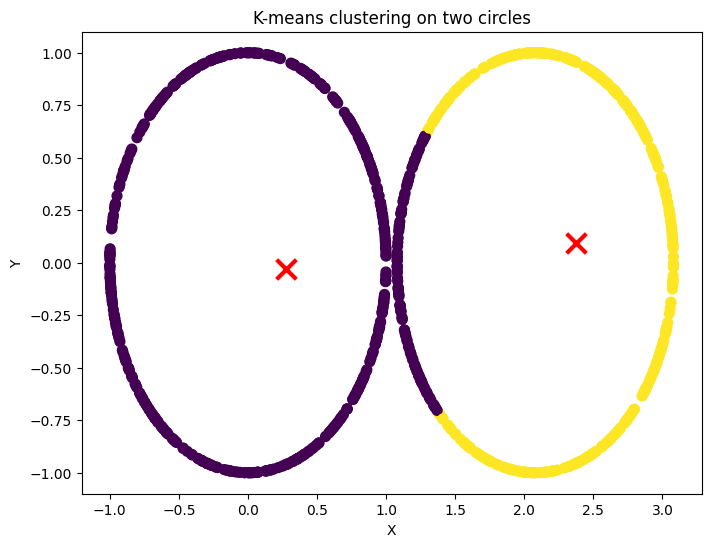

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Генерация данных
np.random.seed(42)

# Параметры окружностей
radius = 1
center1 = (0, 0)
center2 = (2.08, 0)

# Генерация точек для первой окружности
theta1 = np.random.uniform(0, 2 * np.pi, 500)
x1 = center1[0] + radius * np.cos(theta1)
y1 = center1[1] + radius * np.sin(theta1)

# Генерация точек для второй окружности
theta2 = np.random.uniform(0, 2 * np.pi, 500)
x2 = center2[0] + radius * np.cos(theta2)
y2 = center2[1] + radius * np.sin(theta2)

# Объединение данных
X = np.vstack([np.column_stack((x1, y1)), np.column_stack((x2, y2))])

# Применение k-средних
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-means clustering on two circles')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Примеры:

- **Рисунок 2 и 3:**
  - На **рисунке 2** показан пример, где k-средних работает корректно: данные состоят из чётко разделённых выпуклых кластеров.
  - На **рисунке 3** показан пример, где k-средних терпит неудачу: данные имеют сложную геометрию, и кластеры не могут быть разделены выпуклыми границами.


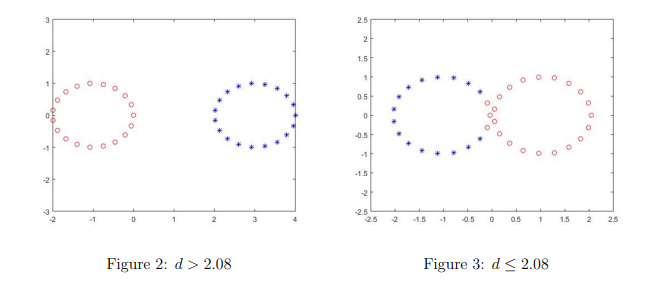


- **Рисунок 4 и 5:**
  - На **рисунке 4** k-средних успешно разделяет данные на два кластера в простом случае, когда кластеры хорошо разделены.
  - На **рисунке 5** k-средних терпит неудачу при увеличении сложности данных: кластеры перекрываются или имеют сложную форму.


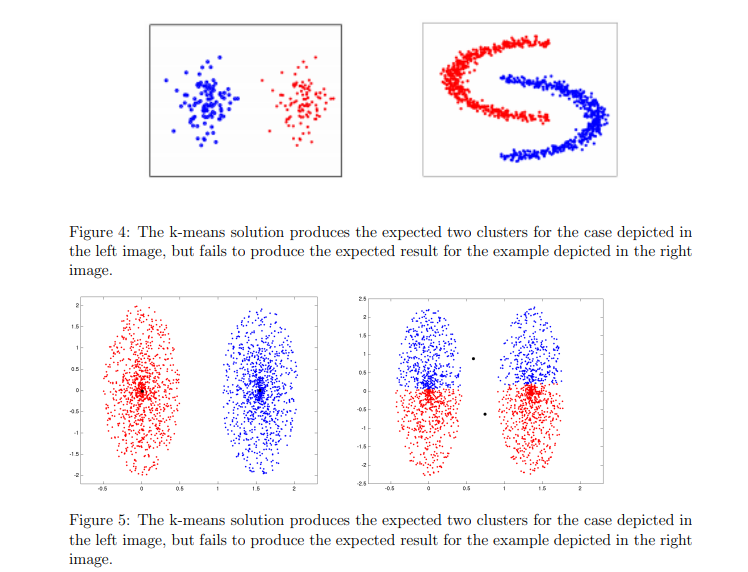




### 6. Альтернативные подходы

Ограничения k-средних подталкивают к поиску более гибких методов кластеризации, которые могут учитывать сложную геометрию данных. Рассмотрим два таких метода:

1. **Спектральная кластеризация:**
   - Этот метод использует спектральные свойства матрицы сходства данных. Вместо того чтобы минимизировать сумму квадратов расстояний, спектральная кластеризация строит граф, где вершины представляют точки данных, а рёбра — меры сходства между ними. Затем метод использует собственные значения и собственные векторы матрицы графа для разделения данных на кластеры.
   - Формально, спектральная кластеризация работает с матрицей Лапласа графа $L = D - W$, где $D$ — диагональная матрица степеней вершин, а $W$ — матрица сходства. Собственные векторы матрицы $L$ используются для проекции данных в новое пространство, где кластеризация становится более простой.

2. **Диффузионные карты:**
   - Этот метод использует идеи из теории диффузии для анализа структуры данных. Диффузионные карты строят вероятностную модель переходов между точками данных, что позволяет учитывать сложные зависимости и геометрию данных.
   - Формально, диффузионные карты строятся на основе матрицы переходов $P$, где $P_{ij}$ — вероятность перехода из точки $x_i$ в точку $x_j$. Собственные значения и собственные векторы матрицы $P$ используются для построения низкоразмерного представления данных, где кластеризация становится более эффективной.



### Заключение

Алгоритм Ллойда (k-средних) является мощным инструментом для кластеризации данных, особенно когда кластеры имеют простую выпуклую форму. Однако его ограничения, такие как чувствительность к начальной инициализации и неспособность работать с данными сложной геометрии, делают его неприменимым в некоторых случаях. Для таких ситуаций существуют более гибкие методы, такие как спектральная кластеризация и диффузионные карты, которые способны учитывать сложные структуры данных.

Рассмотрим конкретный числовой пример для алгоритма k-средних (k-means) и решим его шаг за шагом с использованием формул.



### Постановка задачи
Пусть у нас есть следующие точки в двумерном пространстве:
$$
X = \{(1, 1), (1, 2), (2, 1), (6, 6), (7, 6), (7, 7)\}.
$$
Мы хотим разделить эти точки на $k = 2$ кластера.



### Шаг 1: Инициализация центроидов
Выберем начальные центроиды случайным образом. Пусть:
$$
\mu_1 = (1, 1), \quad \mu_2 = (7, 7).
$$



### Шаг 2: Назначение кластеров
Для каждой точки найдём ближайший центроид, используя евклидово расстояние:
$$
d(x, \mu) = \sqrt{(x_1 - \mu_1)^2 + (x_2 - \mu_2)^2}.
$$

1. **Точка (1, 1):**
$$
   d((1, 1), \mu_1) = \sqrt{(1-1)^2 + (1-1)^2} = 0,
$$
$$
   d((1, 1), \mu_2) = \sqrt{(1-7)^2 + (1-7)^2} = \sqrt{36 + 36} = \sqrt{72} \approx 8.49.
$$
   Ближайший центроид: $\mu_1$. Кластер $C_1 = \{(1, 1)\}$.

2. **Точка (1, 2):**
$$
   d((1, 2), \mu_1) = \sqrt{(1-1)^2 + (2-1)^2} = 1,
$$
$$
   d((1, 2), \mu_2) = \sqrt{(1-7)^2 + (2-7)^2} = \sqrt{36 + 25} = \sqrt{61} \approx 7.81.
$$
   Ближайший центроид: $\mu_1$. Кластер $C_1 = \{(1, 1), (1, 2)\}$.

3. **Точка (2, 1):**
$$
   d((2, 1), \mu_1) = \sqrt{(2-1)^2 + (1-1)^2} = 1,
$$
$$
   d((2, 1), \mu_2) = \sqrt{(2-7)^2 + (1-7)^2} = \sqrt{25 + 36} = \sqrt{61} \approx 7.81.
$$
   Ближайший центроид: $\mu_1$. Кластер $C_1 = \{(1, 1), (1, 2), (2, 1)\}$.

4. **Точка (6, 6):**
$$
   d((6, 6), \mu_1) = \sqrt{(6-1)^2 + (6-1)^2} = \sqrt{25 + 25} = \sqrt{50} \approx 7.07,
$$
$$
   d((6, 6), \mu_2) = \sqrt{(6-7)^2 + (6-7)^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.41.
$$
   Ближайший центроид: $\mu_2$. Кластер $C_2 = \{(6, 6)\}$.

5. **Точка (7, 6):**
$$
   d((7, 6), \mu_1) = \sqrt{(7-1)^2 + (6-1)^2} = \sqrt{36 + 25} = \sqrt{61} \approx 7.81,
$$
$$
   d((7, 6), \mu_2) = \sqrt{(7-7)^2 + (6-7)^2} = \sqrt{0 + 1} = 1.
$$
   Ближайший центроид: $\mu_2$. Кластер $C_2 = \{(6, 6), (7, 6)\}$.

6. **Точка (7, 7):**
$$
   d((7, 7), \mu_1) = \sqrt{(7-1)^2 + (7-1)^2} = \sqrt{36 + 36} = \sqrt{72} \approx 8.49,
$$
$$
   d((7, 7), \mu_2) = \sqrt{(7-7)^2 + (7-7)^2} = 0.
$$
   Ближайший центроид: $\mu_2$. Кластер $C_2 = \{(6, 6), (7, 6), (7, 7)\}$.

Итоговые кластеры после первого шага:
$$
C_1 = \{(1, 1), (1, 2), (2, 1)\}, \quad C_2 = \{(6, 6), (7, 6), (7, 7)\}.
$$



### Шаг 3: Обновление центроидов
Пересчитаем центроиды как среднее всех точек в каждом кластере.

1. **Центроид $\mu_1$:**
$$
   \mu_1 = \left( \frac{1 + 1 + 2}{3}, \frac{1 + 2 + 1}{3} \right) = \left( \frac{4}{3}, \frac{4}{3} \right) \approx (1.33, 1.33).
$$

2. **Центроид $\mu_2$:**
$$
   \mu_2 = \left( \frac{6 + 7 + 7}{3}, \frac{6 + 6 + 7}{3} \right) = \left( \frac{20}{3}, \frac{19}{3} \right) \approx (6.67, 6.33).
$$



### Шаг 4: Повторение шагов 2 и 3
Повторим шаг 2 с новыми центроидами.

1. **Точка (1, 1):**
$$
   d((1, 1), \mu_1) = \sqrt{(1-1.33)^2 + (1-1.33)^2} \approx 0.47,
$$
$$
   d((1, 1), \mu_2) = \sqrt{(1-6.67)^2 + (1-6.33)^2} \approx 7.54.
$$
   Ближайший центроид: $\mu_1$.

2. **Точка (1, 2):**
$$
   d((1, 2), \mu_1) = \sqrt{(1-1.33)^2 + (2-1.33)^2} \approx 0.75,
$$
$$
   d((1, 2), \mu_2) = \sqrt{(1-6.67)^2 + (2-6.33)^2} \approx 6.67.
$$
   Ближайший центроид: $\mu_1$.

3. **Точка (2, 1):**
$$
   d((2, 1), \mu_1) = \sqrt{(2-1.33)^2 + (1-1.33)^2} \approx 0.75,
$$
$$
   d((2, 1), \mu_2) = \sqrt{(2-6.67)^2 + (1-6.33)^2} \approx 6.67.
$$
   Ближайший центроид: $\mu_1$.

4. **Точка (6, 6):**
$$
   d((6, 6), \mu_1) = \sqrt{(6-1.33)^2 + (6-1.33)^2} \approx 6.67,
$$
$$
   d((6, 6), \mu_2) = \sqrt{(6-6.67)^2 + (6-6.33)^2} \approx 0.75.
$$
   Ближайший центроид: $\mu_2$.

5. **Точка (7, 6):**
$$
   d((7, 6), \mu_1) = \sqrt{(7-1.33)^2 + (6-1.33)^2} \approx 7.54,
$$
$$
   d((7, 6), \mu_2) = \sqrt{(7-6.67)^2 + (6-6.33)^2} \approx 0.47.
$$
   Ближайший центроид: $\mu_2$.

6. **Точка (7, 7):**
$$
   d((7, 7), \mu_1) = \sqrt{(7-1.33)^2 + (7-1.33)^2} \approx 8.03,
$$
$$
   d((7, 7), \mu_2) = \sqrt{(7-6.67)^2 + (7-6.33)^2} \approx 0.75.
$$
   Ближайший центроид: $\mu_2$.

Кластеры не изменились, поэтому алгоритм завершает работу.



### Итоговые кластеры:
$$
C_1 = \{(1, 1), (1, 2), (2, 1)\}, \quad C_2 = \{(6, 6), (7, 6), (7, 7)\}.
$$

Центроиды:
$$
\mu_1 \approx (1.33, 1.33), \quad \mu_2 \approx (6.67, 6.33).
$$


Реализуем алгоритм k-средних (k-means) на Python с визуализацией. Мы будем использовать библиотеки `numpy` для вычислений и `matplotlib` для визуализации.

### Код на Python


Кластеры: [1 1 1 0 0 0]
Центроиды: [[6.66666667 6.33333333]
 [1.33333333 1.33333333]]


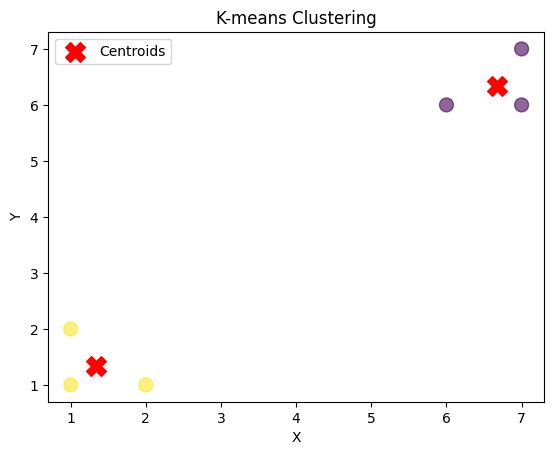

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
data = np.array([[1, 1], [1, 2], [2, 1], [6, 6], [7, 6], [7, 7]])

# Количество кластеров
k = 2

# Инициализация центроидов
def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

# Назначение кластеров
def assign_clusters(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Обновление центроидов
def update_centroids(data, clusters, k):
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Алгоритм k-means
def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Визуализация
def plot_clusters(data, clusters, centroids):
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title('K-means Clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Запуск алгоритма
clusters, centroids = kmeans(data, k)
print("Кластеры:", clusters)
print("Центроиды:", centroids)

# Визуализация результатов
plot_clusters(data, clusters, centroids)